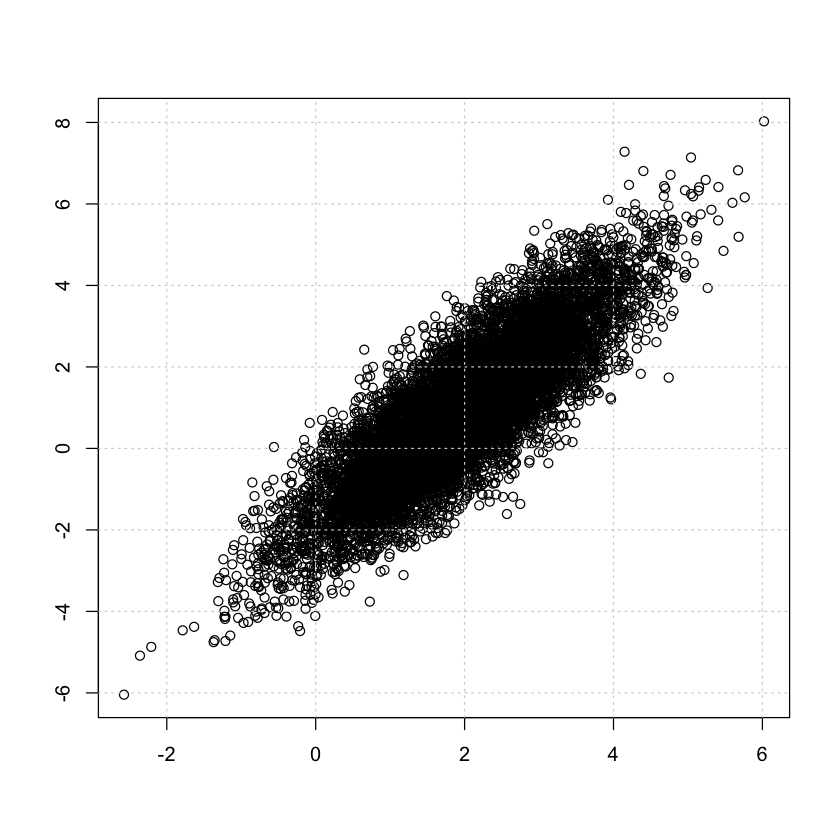

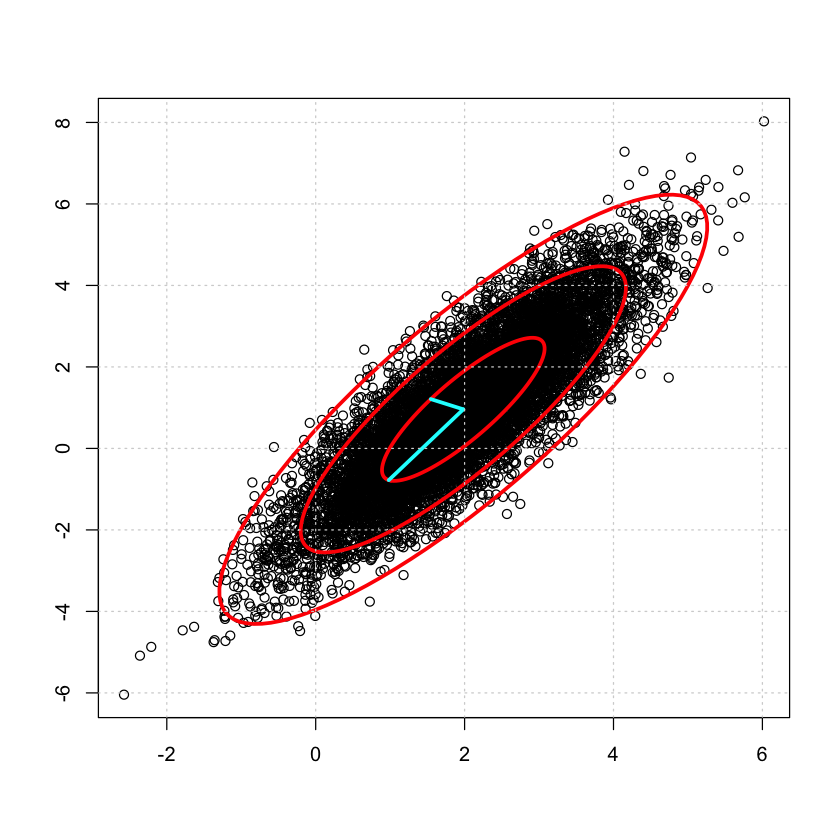

In [84]:
xC <- c(2, 1)      # Center of data (mean)
sig <- c(2, 0.5)   # Principal axes

theta <- pi/3      # Rotate cloud by pi/3

R <- c(cos(theta), -sin(theta), sin(theta), cos(theta))
R <- matrix(R, 2, 2)
R <- t(R)

num_points <- 10000            # Create 10,000 points
X <- R %*% diag(sig) %*% matrix( rnorm(2*num_points, mean=0, sd=1), 2, num_points) + diag(xC) %*% matrix(1, 2, num_points)

plot(X[1,], X[2,], xlab="", ylab="")
grid()

Xavg <- t(t(rowMeans(X)))  # Compute mean
Xavg <- do.call("cbind", rep(list(Xavg),  num_points))

B = X - Xavg      # Mean-subtracted data

res <- svd(B/sqrt(num_points))

theta = 2 * pi * seq(0,1,0.01)

e <- do.call(rbind, list(cos(theta), sin(theta)))

Xstd = res$u %*% diag(res$d) %*% e

plot(X[1,], X[2,], xlab="", ylab="")    # Plot data to overlay PCA
lines(Xavg[1] +  Xstd[1,], Xavg[2] + Xstd[2,], col="red", pch=19, lwd=3)
lines(Xavg[1] +  2*Xstd[1,], Xavg[2] + 2*Xstd[2,], col="red", lwd=3)
lines(Xavg[1] +  3*Xstd[1,], Xavg[2] + 3*Xstd[2,], col="red", lwd=3)
lines(c(Xavg[1], Xavg[1]+res$u[1,1]*res$d[1]), c(Xavg[2], Xavg[2]+res$u[2,1]*res$d[1]), col="cyan", lwd=3)
lines(c(Xavg[1], Xavg[1]+res$u[1,2]*res$d[2]), c(Xavg[2], Xavg[2]+res$u[2,2]*res$d[2]), col="cyan", lwd=3)

grid()